## Machine Learning Project [CS 306]

## What we have done?** \
**We have a dataset of sarcastic Detetion 
    **There is each dataset, which consists label:** \
        - is_sarcastic: 1 if the dataset is sarcastic, 0 otherwise\
        



  **For this task we need to work with the following plan:**\
  
    >>> Read and clean the data 
    >>> Find and visualise most common words 
    >>> Identify and visualise stop words 
    >>> Preprocess text 
    >>> Define classification models 
    >>> Retrieve and save the best model 

   

**Import library necessary**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

: 

In [4]:
import nltk
# nltk.download()

**Reading and Cleaning the Data**

In [5]:
# read the file
data = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [6]:
# view the data
data.head(100)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
95,0,number of homeless students in america is risi...,https://www.huffingtonpost.com/entry/homeless-...
96,1,report: majority of instances of people gettin...,https://www.theonion.com/report-majority-of-in...
97,1,groundbreaking study finds gratification can b...,https://www.theonion.com/groundbreaking-study-...
98,0,nick cannon responds to mariah carey's engagem...,https://www.huffingtonpost.com/entry/nick-cann...


In [7]:
# shape of the data
data.shape

(28619, 3)

In [8]:
data_len = data['headline'].apply(lambda x: len(x.split(' '))).sum()
print(f'We have {data_len} words in the headline')

We have 287674 words in the headline


In [9]:
# check the columns names
data.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [10]:
# check the data types in the columns
data.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [11]:
#checking the unique values in 'is_sarcastic' column
data.is_sarcastic.unique()

array([1, 0], dtype=int64)

In [12]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

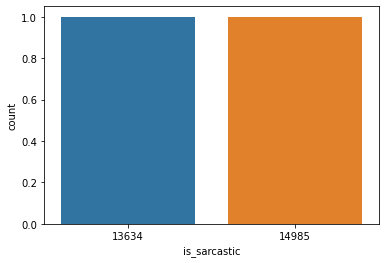

In [13]:
#checking the value counts in 'is_sarcastic' column
data.is_sarcastic.value_counts()
sns.countplot(data['is_sarcastic'].value_counts())
plt.show()

In [14]:
# check the null values in data
data.isna().sum() 

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [15]:
#drop 'article_link' column
data = data.drop('article_link', axis=1)

In [16]:
#ckeck the data
data.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
5,0,my white inheritance
6,0,5 ways to file your taxes with less stress
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...
9,0,lots of parents know this scenario


# Preprocessing

In [17]:
#import necessary library
import re
from nltk.corpus import stopwords

set_stopwords = set(stopwords.words("english"))


def clean_txt(text): # define the fuction with tokenization/string cleaning for all datasets 
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = re.sub(r'\[[^]]*\]'," ", text) 
    text = re.sub(r"\'s", "", text) 
    text = re.sub(r"\'t", "", text ) 
    text = re.sub(r"\'re", "",text) 
    text = re.sub(r"\'d", "", text) 
    text = re.sub(r"\'ll", " ",text) 
    text = re.sub(r",", " ", text) 
    text = re.sub(r"\(", " ", text) 
    text = re.sub(r"\)", " ", text) 
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

data['headline'] = data['headline'].apply(clean_txt)

In [18]:
data_clean_len = data['headline'].apply(lambda x: len(x.split(' '))).sum() 
print(f'After text cleaning we have only {data_clean_len} words to work with')

After text cleaning we have only 205988 words to work with


*Most common words*

## Visualization

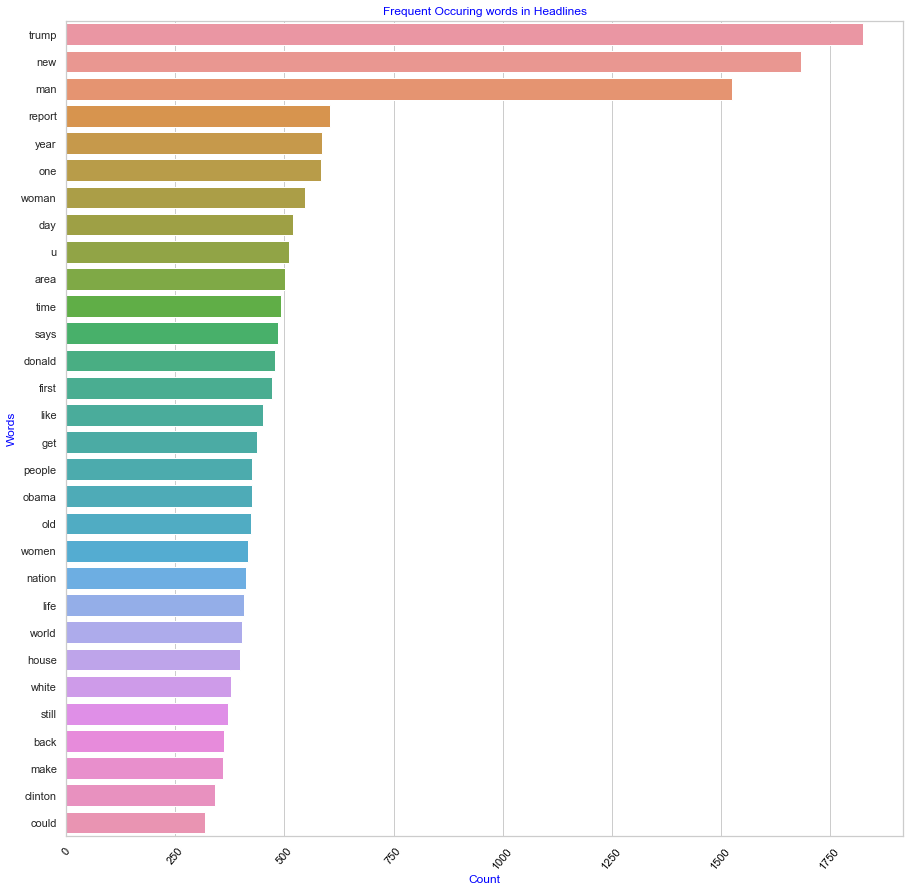

In [19]:
from collections import Counter #import Counter for finding most common words
import seaborn as sns #import searbon for vizualization result

text = data['headline']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0) #converting to Dataframe and drop the Nones values
#result_df
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 15)) 
sns.barplot(y=result_df[0][0:30], x=result_df[1][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring words in Headlines", color="blue") 
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

**Finding most common words in 'is_sarcastic' column**

In [20]:
#create DataFrame for sarcastic words 
sarcastic = pd.DataFrame(data[data['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [21]:
#create DataFrame for non_sarcastic words 
non_sarcastic = pd.DataFrame(data[data['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

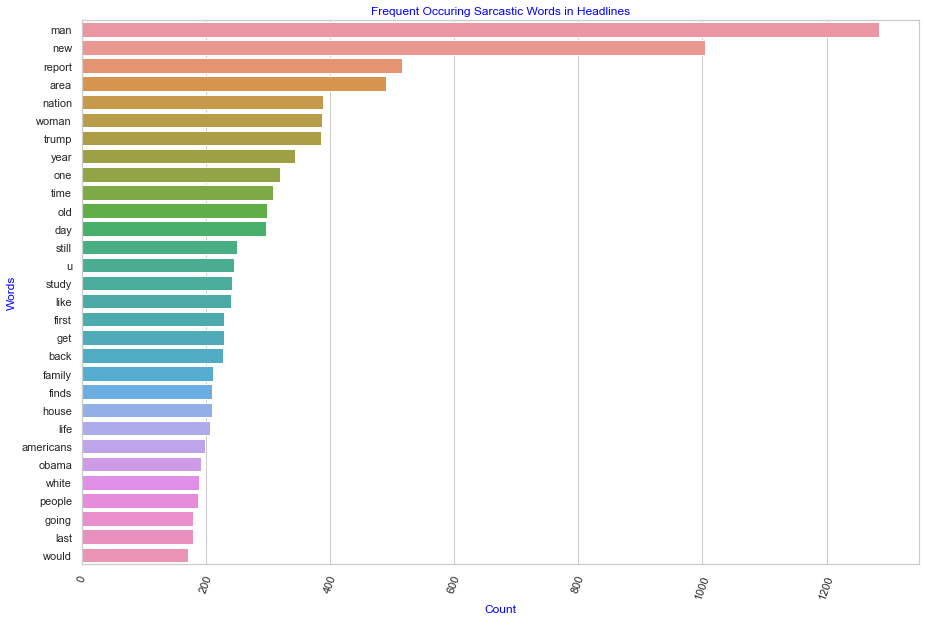

In [22]:
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=sarcastic['index'][0:30], x=sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

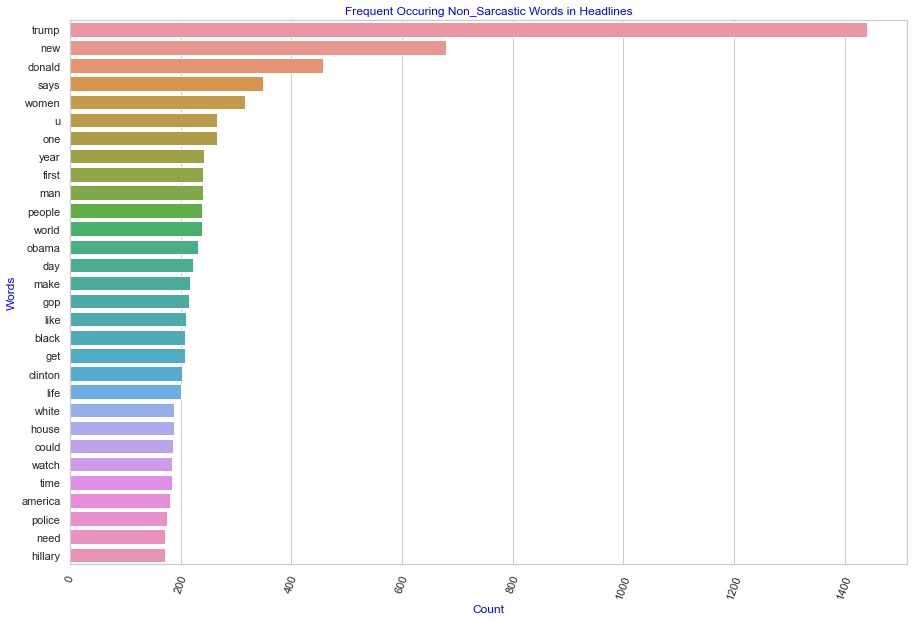

In [23]:
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=non_sarcastic['index'][0:30], x=non_sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Non_Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

**WordCloud Vizualization with StopWords**

In [24]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

sarcasctic_2 = [every_word.lower() for every_word in sarcastic['index']]

sarc_nonstop = [word for word in sarcasctic_2 if word not in stopwords]

non_sarcasctic_2 = [every_word.lower() for every_word in non_sarcastic['index']]

non_sarc_nonstop = [word for word in non_sarcasctic_2 if word not in stopwords]


# Text pre-processing***

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(data['headline']).toarray()
y = data.iloc[:, -1].values
cv.get_feature_names()
df = pd.DataFrame(X_cv, columns=cv.get_feature_names())
df

,ab,abandon,abandoned,abandoning,abandons,abayas,abbas,abbey,abbi,abby,...,zookeeper,zoolander,zoologist,zoologists,zoomed,zoroastrianism,zsa,ztari,zucker,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Split text to train and test**

In [32]:
from sklearn.model_selection import train_test_split # import library for train_test_split
X = text
y = data.is_sarcastic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

**Multinomial Naive Bayes Classifier**

In [33]:
from sklearn.naive_bayes import MultinomialNB 


In [34]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score, accuracy_score, classification_report


pipe1 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1,)), 
                   ('MNB', MultinomialNB()),])

parameters1 = {'vectr__ngram_range': [(1,1),(1,2),(1,3)],
                    'MNB__alpha': [0.05,0.1,0.5,1.0,2.0,4.0],
                'MNB__fit_prior': [True]}
gridMNB = GridSearchCV(pipe1, parameters1 ,cv=7,n_jobs=-1, verbose=3)
gridMNB.fit(X_train, y_train)

%time y_pred1 = gridMNB.predict(X_test)

#getting the best accuracy and parameters
print('MNB_Train Accuracy : %.3f'%gridMNB.best_estimator_.score(X_train, y_train))
print('MNB_Test Accuracy : %.3f'%gridMNB.best_estimator_.score(X_test, y_test))
print('MNB_Best Accuracy Through Grid Search : %.3f'%gridMNB.best_score_)
print('MNB_Best Parameters : ',gridMNB.best_params_)
print(15*'--->--->')
print('classification_report: \n', classification_report(y_test, y_pred1))

Fitting 7 folds for each of 18 candidates, totalling 126 fits
CPU times: total: 109 ms
Wall time: 194 ms
MNB_Train Accuracy : 0.990
MNB_Test Accuracy : 0.815
MNB_Best Accuracy Through Grid Search : 0.809
MNB_Best Parameters :  {'MNB__alpha': 1.0, 'MNB__fit_prior': True, 'vectr__ngram_range': (1, 2)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1493
           1       0.80      0.82      0.81      1369

    accuracy                           0.82      2862
   macro avg       0.81      0.82      0.82      2862
weighted avg       0.82      0.82      0.82      2862



**Stochastic Gradient Descent Classifier**

In [35]:
from sklearn.linear_model import SGDClassifier

pipe2 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('SGD', SGDClassifier(loss='modified_huber', penalty='l2',alpha=0.0001,shuffle=True,
                                      learning_rate='optimal',random_state=None, max_iter=100,)),
                   ])
parameters2 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'SGD__alpha': [0.0001,0.01,1,10],
                'SGD__max_iter': [1,10,100,1000],
                  'SGD__loss': ['modified_huber'],
                  'SGD__penalty': ['l2']}

              
gridSGD = GridSearchCV(pipe2, parameters2 ,cv=8, n_jobs=-1, verbose=3)
gridSGD.fit(X_train, y_train)

%time y_pred2 = gridSGD.predict(X_test)

print('SGD_Train Accuracy : %.3f'%gridSGD.best_estimator_.score(X_train, y_train))
print('SGD_Test Accuracy : %.3f'%gridSGD.best_estimator_.score(X_test, y_test))
print('SGD_Best Accuracy Through Grid Search : %.3f'%gridSGD.best_score_)
print('SGD_Best Parameters : ',gridSGD.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred2))                                     

Fitting 8 folds for each of 32 candidates, totalling 256 fits


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


CPU times: total: 188 ms
Wall time: 205 ms
SGD_Train Accuracy : 0.995
SGD_Test Accuracy : 0.810
SGD_Best Accuracy Through Grid Search : 0.809
SGD_Best Parameters :  {'SGD__alpha': 0.0001, 'SGD__loss': 'modified_huber', 'SGD__max_iter': 10, 'SGD__penalty': 'l2', 'vectr__ngram_range': (1, 2)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1493
           1       0.79      0.81      0.80      1369

    accuracy                           0.81      2862
   macro avg       0.81      0.81      0.81      2862
weighted avg       0.81      0.81      0.81      2862



**KNeighbors Classifier**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

pipe3 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('KN', KNeighborsClassifier(n_neighbors=5, algorithm='brute', weights='uniform', metric='minkowski')),
                   ])

                
parameters3 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'KN__n_neighbors': [15,30,45,60,75,90],
                    'KN__p': [2],
                    'KN__leaf_size': [10,20]
              }


gridKN = GridSearchCV(pipe3, parameters3, scoring='accuracy',cv=6, n_jobs=-1, verbose=3)
gridKN.fit(X_train, y_train)

%time y_pred3 = gridKN.predict(X_test)
print('KN_Train Accuracy : %.3f'%gridKN.best_estimator_.score(X_train, y_train))
print('KN_Test Accuracy : %.3f'%gridKN.best_estimator_.score(X_test, y_test))
print('KN_Best Accuracy Through Grid Search : %.3f'%gridKN.best_score_)
print('KN_Best Parameters : ',gridKN.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred3))  


Fitting 6 folds for each of 24 candidates, totalling 144 fits
CPU times: total: 2.8 s
Wall time: 3.74 s
KN_Train Accuracy : 0.744
KN_Test Accuracy : 0.739
KN_Best Accuracy Through Grid Search : 0.729
KN_Best Parameters :  {'KN__leaf_size': 10, 'KN__n_neighbors': 75, 'KN__p': 2, 'vectr__ngram_range': (1, 1)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.90      0.78      1493
           1       0.84      0.56      0.67      1369

    accuracy                           0.74      2862
   macro avg       0.76      0.73      0.73      2862
weighted avg       0.76      0.74      0.73      2862



**Logistic Regression Classifier**

In [37]:
from sklearn.linear_model import LogisticRegression

pipe4 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                ('tfidf', TfidfTransformer()),
                ('LR', LogisticRegression(penalty='l2',C=1.0,random_state=None,
                                          solver='liblinear',intercept_scaling=1, max_iter=100,)),
               ])

parameters4 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'LR__C': [3,4,5,6,7],
                    'LR__tol': [0.0001,0.01,0.1],
                  'LR__max_iter': [50,75,100]
              }

gridLR = GridSearchCV(pipe4, parameters4 ,cv=4, verbose=1, n_jobs=-1)
gridLR.fit(X_train, y_train)

%time y_pred4 = gridLR.predict(X_test)
print('LR_Train Accuracy : %.3f'%gridLR.best_estimator_.score(X_train, y_train))
print('LR_Test Accuracy : %.3f'%gridLR.best_estimator_.score(X_test, y_test))
print('LR_Best Accuracy Through Grid Search : %.3f'%gridLR.best_score_)
print('LR_Best Parameters : ',gridLR.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred4)) 

Fitting 4 folds for each of 90 candidates, totalling 360 fits
CPU times: total: 219 ms
Wall time: 134 ms
LR_Train Accuracy : 0.998
LR_Test Accuracy : 0.807
LR_Best Accuracy Through Grid Search : 0.804
LR_Best Parameters :  {'LR__C': 7, 'LR__max_iter': 50, 'LR__tol': 0.1, 'vectr__ngram_range': (1, 2)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1493
           1       0.79      0.81      0.80      1369

    accuracy                           0.81      2862
   macro avg       0.81      0.81      0.81      2862
weighted avg       0.81      0.81      0.81      2862



**Decision Tree Classifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier

pipe5 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('DTree', DecisionTreeClassifier(criterion='gini', splitter='best',random_state=0 ,min_samples_leaf=1)),
               ])

parameters5 = {'vectr__ngram_range': [(1,1),(1,2)],
               'DTree__criterion' : ['gini'],
               'DTree__max_features': ['auto'],
               'DTree__max_depth': [2, 3, 5, 10, 15],
               'DTree__min_samples_split': [2, 3, 5, 7, 9],
               'DTree__min_samples_leaf': [1,5,8,11],
              }

gridDtree = GridSearchCV(pipe5, parameters5, cv=5)
gridDtree.fit(X_train, y_train)

%time y_pred5 = gridDtree.predict(X_test)
print('Dtree_Train Accuracy : %.3f'%gridDtree.best_estimator_.score(X_train, y_train))
print('Dtree_Test Accuracy : %.3f'%gridDtree.best_estimator_.score(X_test, y_test))
print('Dtree_Best Accuracy Through Grid Search : %.3f'%gridDtree.best_score_)
print('Dtree_Best Parameters : ',gridDtree.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred5)) 

CPU times: total: 141 ms
Wall time: 160 ms
Dtree_Train Accuracy : 0.533
Dtree_Test Accuracy : 0.524
Dtree_Best Accuracy Through Grid Search : 0.541
Dtree_Best Parameters :  {'DTree__criterion': 'gini', 'DTree__max_depth': 15, 'DTree__max_features': 'auto', 'DTree__min_samples_leaf': 5, 'DTree__min_samples_split': 2, 'vectr__ngram_range': (1, 2)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.52      0.99      0.68      1493
           1       0.57      0.02      0.04      1369

    accuracy                           0.52      2862
   macro avg       0.55      0.50      0.36      2862
weighted avg       0.55      0.52      0.38      2862



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe6 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('RF', RandomForestClassifier(n_estimators=100,criterion='gini', max_features='auto',
                                               random_state=None ,min_samples_leaf=1)),
               ])

parameters6 = {'vectr__ngram_range': [(1,1),(1,2)],
               'RF__n_estimators': [100,200],
                'RF__criterion': ['gini'],
               'RF__min_samples_split': [2],
               'RF__min_samples_leaf': [1],
              }

gridRF = GridSearchCV(pipe6, parameters6 ,cv=8, verbose=1, n_jobs=-1)
gridRF.fit(X_train, y_train)

%time y_pred6 = gridRF.predict(X_test)
print('RF_Train Accuracy : %.3f'%gridRF.best_estimator_.score(X_train, y_train))
print('RF_Test Accuracy : %.3f'%gridRF.best_estimator_.score(X_test, y_test))
print('RF_Best Accuracy Through Grid Search : %.3f'%gridRF.best_score_)
print('RF_Best Parameters : ',gridRF.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred6)) 

Fitting 8 folds for each of 4 candidates, totalling 32 fits


**Support Vector Classification**

In [ ]:
from sklearn.svm import SVC

pipe7 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('SVC', SVC(C=1.0, kernel='rbf', max_iter=-1,
                                random_state=None ,cache_size=200)),
               ])

parameters7 = {'vectr__ngram_range': [(1,1),(1,2)],
               'SVC__C': [0.1,1,10],
                'SVC__kernel': ['rbf'],
              'SVC__degree': [1,2,3],
               'SVC__cache_size': [50,100,200]
              }

gridSVC = GridSearchCV(pipe7, parameters7 ,cv=3, verbose=3, n_jobs=-1)
gridSVC.fit(X_train, y_train)

%time y_pred7 = gridSVC.predict(X_test)
print('SVC_Train Accuracy : %.3f'%gridSVC.best_estimator_.score(X_train, y_train))
print('SVC_Test Accuracy : %.3f'%gridSVC.best_estimator_.score(X_test, y_test))
print('SVC_Best Accuracy Through Grid Search : %.3f'%gridSVC.best_score_)
print('SVC_Best Parameters : ',gridSVC.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred7)) 

Fitting 3 folds for each of 54 candidates, totalling 162 fits
CPU times: total: 9.89 s
Wall time: 9.99 s
SVC_Train Accuracy : 1.000
SVC_Test Accuracy : 0.813
SVC_Best Accuracy Through Grid Search : 0.801
SVC_Best Parameters :  {'SVC__C': 10, 'SVC__cache_size': 50, 'SVC__degree': 1, 'SVC__kernel': 'rbf', 'vectr__ngram_range': (1, 2)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1493
           1       0.80      0.81      0.80      1369

    accuracy                           0.81      2862
   macro avg       0.81      0.81      0.81      2862
weighted avg       0.81      0.81      0.81      2862



**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


pipe8 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('BST', GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, random_state=0)),
                   ])

                
parameters8 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'BST__n_estimators': [50,100,200],
                    'BST__max_depth': [3,4,5],
                    'BST__learning_rate': [0.05,0.01,0.5,1.0]
              }


gridBoost = GridSearchCV(pipe8, parameters8, cv=3, verbose=3, n_jobs=-1)
gridBoost.fit(X_train, y_train)

%time y_pred8 = gridBoost.predict(X_test)
print('Boost_Train Accuracy : %.3f'%gridBoost.best_estimator_.score(X_train, y_train))
print('Boost_Test Accuracy : %.3f'%gridBoost.best_estimator_.score(X_test, y_test))
print('Boost_Best Accuracy Through Grid Search : %.3f'%gridBoost.best_score_)
print('Boost_Best Parameters : ',gridBoost.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred7))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: total: 46.9 ms
Wall time: 48.2 ms
Boost_Train Accuracy : 0.874
Boost_Test Accuracy : 0.755
Boost_Best Accuracy Through Grid Search : 0.746
Boost_Best Parameters :  {'BST__learning_rate': 0.5, 'BST__max_depth': 5, 'BST__n_estimators': 200, 'vectr__ngram_range': (1, 1)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1493
           1       0.80      0.81      0.80      1369

    accuracy                           0.81      2862
   macro avg       0.81      0.81      0.81      2862
weighted avg       0.81      0.81      0.81      2862



In [ ]:
from sklearn import  metrics # import library for getting scores

models = []
models.append(('MNB', gridMNB.best_estimator_))
models.append(('SGD', gridSGD.best_estimator_))
models.append(('KN', gridKN.best_estimator_))
models.append(('LR', gridLR.best_estimator_))
models.append(('Dtree', gridDtree.best_estimator_))
models.append(('RF', gridRF.best_estimator_))
models.append(('SVC', gridSVC.best_estimator_))
models.append(('BST', gridBoost.best_estimator_))
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    

    precision_score.append(metrics.precision_score(y_test , model.predict(X_test), average='weighted') )
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test), average='weighted') )
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test), average='weighted') )
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))


MNB
precision_score: 0.8157672916493938
recall_score: 0.8151642208245982
f1_score: 0.8152459448669404
accuracy_score: 0.8151642208245982
SGD
precision_score: 0.813230657665537
recall_score: 0.813067784765898
f1_score: 0.8131133750963596
accuracy_score: 0.813067784765898
KN
precision_score: 0.7616470450153116
recall_score: 0.7389937106918238
f1_score: 0.7305234707867467
accuracy_score: 0.7389937106918238
LR
precision_score: 0.8085009212109592
recall_score: 0.8081761006289309
f1_score: 0.8082436882120148
accuracy_score: 0.8081761006289309
Dtree
precision_score: 0.546313712476206
recall_score: 0.5241090146750524
f1_score: 0.3755502271354799
accuracy_score: 0.5241090146750524
RF
precision_score: 0.7728357702673126
recall_score: 0.7707896575821104
f1_score: 0.769604692862399
accuracy_score: 0.7707896575821104
SVC
precision_score: 0.8127735935329693
recall_score: 0.8127183787561146
f1_score: 0.8127396316419917
accuracy_score: 0.8127183787561146
BST
precision_score: 0.7607693454906628
recall_

## VISUALIZing the best MODEL 

In [ ]:
#creat the Data Frame for scores in models
import pandas as pd
scores = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=scores)
df.insert(loc=0, column='Model', value=['MNB', 'SGD','KNN','LogReg','RandFor','DTree','SVC', 'BST'])
df.sort_values('accuracy_score',ascending=False)

,Model,precision_score,recall_score,f1_score,accuracy_score
0,MNB,0.815767,0.815164,0.815246,0.815164
1,SGD,0.813231,0.813068,0.813113,0.813068
6,SVC,0.812774,0.812718,0.812740,0.812718
3,LogReg,0.808501,0.808176,0.808244,0.808176
5,DTree,0.772836,0.770790,0.769605,0.770790
7,BST,0.760769,0.755066,0.752393,0.755066
2,KNN,0.761647,0.738994,0.730523,0.738994
4,RandFor,0.546314,0.524109,0.375550,0.524109


In [ ]:
#creat the Data Frame for accuracy scores
acc = {
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=acc)
df.insert(loc=0, column='Model', value=['MNB', 'SGD','KNN','LogReg','RandFor','DTree','SVC','BST'])
#df

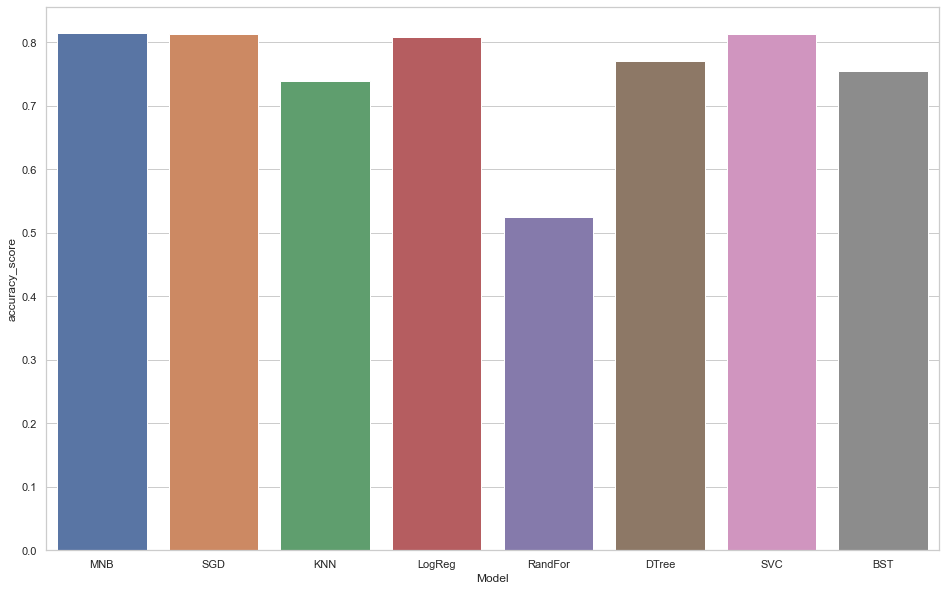

In [ ]:
plt.figure(figsize = (16,10)) #plot the accuracy scores
sns.barplot(x=df['Model'], y=df['accuracy_score'], data=df)
plt.show()

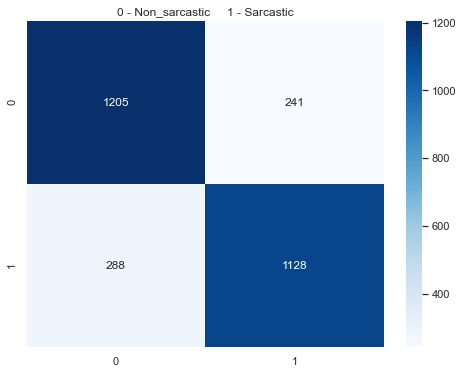

In [ ]:
# Using counfusion matrix for best model(MultinomialNB )
from sklearn.metrics import confusion_matrix,classification_report
conf_mtx=confusion_matrix(y_pred1,y_test)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='Blues')
plt.title("0 - Non_sarcastic     1 - Sarcastic")
plt.show()